# Loan Prediction III - Analytics Vidhya
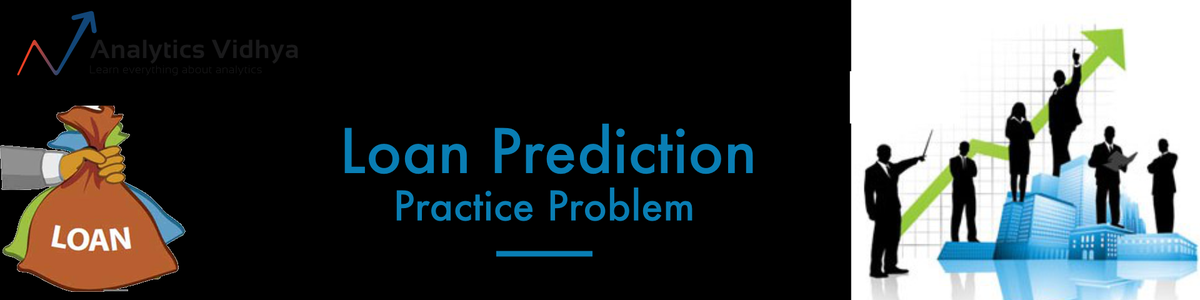

### Competition URL: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Problem Statement
 Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
 Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem:
 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
  application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
  Credit History and others. To automate this process, they have given a problem to identify the customers segments, 
  those are eligible for loan amount so that they can specifically target these customers. 
  Here they have provided a partial data set

In [1]:
# First let's import the libraries we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data loading and overview

In [2]:
# Load train data set and take a quick look at it
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Checking the number of rows and columns in this dataset (614 rows, 13 columns)
train.shape, test.shape

((614, 13), (367, 12))

There are only 614 samples in the training data set, which can probably be a challenge for us to train models.

Let's now explore each column one by one.



Let's also check the data type for each of the variables

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can also see the number of rows that have NA values for each column

In [5]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 As we can see, we have information about all applicants' education status, income (and their coapplicants), and property area (urban/ semi urban / rural).
 Curiosly, 22 applicants did not specify the loan amount they desire.
 Besides, 50 applicants out of 614 do not have credit history information, which can be a problem for us to decide if they meet the guideline to get a loan or not.

### Loan_ID

In [6]:
# The 'Loan_ID' column does not give us relevant information for predicting if a loan should be approved or not, so we can just drop it from both data sets.
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

Before we move on to the following variables listed in the order of the data frame columns, let's change a few details to make the data set more _concise_ and to produce better data visualisations.

First, from the Data description in the competition web page, the **LoanAmount** column's data is in _thousands_ of US Dollars, whereas those for **ApplicantIncome** and **CoapplicantIncome** are in US Dollars. We can change this by simply multiplying all the values in the LoanAmount column by 1,000.

In [7]:
train['LoanAmount'] = train['LoanAmount'].map(lambda x:x*1000)
test['LoanAmount'] = test['LoanAmount'].map(lambda x:x*1000);

A glimpse of the change made:

In [8]:
train.LoanAmount.head(10)

0         NaN
1    128000.0
2     66000.0
3    120000.0
4    141000.0
5    267000.0
6     95000.0
7    158000.0
8    168000.0
9    349000.0
Name: LoanAmount, dtype: float64

Second, let's apply a log transformation to the following columns in both data sets: **LoanAmount**, **ApplicantIncome** and **CoapplicantIncome** as they are all right skewed, as seen in the plots below.

C:\Users\porto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\porto\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


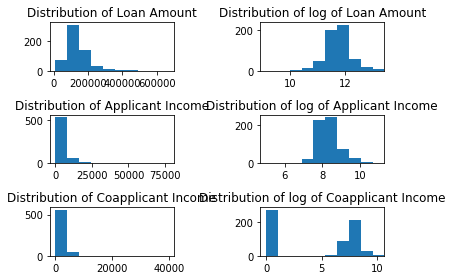

In [9]:
# 3 rows, 2 columns, 1st graph (and so on)...
plt.subplot(3, 2, 1)
plt.hist(train['LoanAmount'])
plt.xlim(right=train['LoanAmount'].max())
plt.title('Distribution of Loan Amount')

plt.subplot(3, 2, 2)
plt.hist(np.log1p(train['LoanAmount']))
plt.xlim(right=np.log1p(train['LoanAmount']).max())
plt.title('Distribution of log of Loan Amount')

plt.subplot(3, 2, 3)
plt.hist(train['ApplicantIncome'])
plt.xlim(right=train['ApplicantIncome'].max())
plt.title('Distribution of Applicant Income')

plt.subplot(3, 2, 4)
plt.hist(np.log1p(train['ApplicantIncome']))
plt.xlim(right=np.log1p(train['ApplicantIncome']).max())
plt.title('Distribution of log of Applicant Income')

plt.subplot(3, 2, 5)
plt.hist(train['CoapplicantIncome'])
plt.xlim(right=train['CoapplicantIncome'].max())
plt.title('Distribution of Coapplicant Income')

plt.subplot(3, 2, 6)
plt.hist(np.log1p(train['CoapplicantIncome']))
plt.xlim(right=np.log1p(train['CoapplicantIncome']).max())
plt.title('Distribution of log of Coapplicant Income')

plt.tight_layout()
plt.show()

For now, let's add the log-transformed variables to both data sets. We might drop the original columns later on.

In [10]:
train['log_LoanAmount'] = np.log1p(train['LoanAmount'])
test['log_LoanAmount'] = np.log1p(test['LoanAmount'])
train['log_ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
test['log_ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
train['log_CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])
test['log_CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])

### Gender

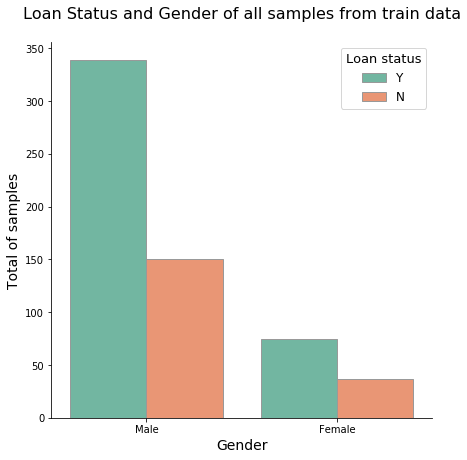

In [11]:
# Grouped barplot correlating Gender and Loan_Status

loan_status_gender_count = sns.catplot(x='Gender', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Gender of all samples from train data\n", fontsize=16)
loan_status_gender_count.set_xlabels('Gender', fontsize=14)
loan_status_gender_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [12]:
male_approved = train[(train.Gender == 'Male') &  (train.Loan_Status == 'Y')]
male_denied = train[(train.Gender == 'Male') &  (train.Loan_Status == 'N')]
female_approved = train[(train.Gender == 'Female') &  (train.Loan_Status == 'Y')]
female_denied = train[(train.Gender == 'Female') &  (train.Loan_Status == 'N')]

male_rate = (len(male_approved.index) / (len(male_approved.index) + len(male_denied.index)))
female_rate = (len(female_approved.index) / (len(female_approved.index) + len(female_denied.index)))

print('The proportion of approved male applicants is %.2f and that of female applicants is %.2f' % (male_rate, female_rate))

The proportion of approved male applicants is 0.69 and that of female applicants is 0.67


Let's also check the proportion for the 13 applicants that did not specify their gender in the application

In [13]:
null_gender = train[train['Gender'].isnull()]
null_gender.sort_values(by='Loan_Status')

null_approved = null_gender[(null_gender.Loan_Status == 'Y')]
null_denied = null_gender[(null_gender.Loan_Status == 'N')]

null_rate = (len(null_approved.index) / (len(null_approved.index) + len(null_denied.index)))

print('The proportion of approved non-specified gender applicants is %.2f' % (null_rate))

# The data for the applicants that did not reveal their gender
null_gender

The proportion of approved non-specified gender applicants is 0.62


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_ApplicantIncome,log_CoapplicantIncome
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112000.0,360.0,0.0,Rural,N,11.626263,8.121480,7.559038
126,NaN,Yes,3+,Graduate,No,23803,0.0,370000.0,360.0,1.0,Rural,Y,12.821261,10.077609,0.000000
171,NaN,Yes,3+,Graduate,No,51763,0.0,700000.0,300.0,1.0,Urban,Y,13.458837,10.854450,0.000000
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168000.0,360.0,1.0,Rural,Y,12.031725,6.514713,8.574896
314,NaN,Yes,0,Graduate,No,2473,1843.0,159000.0,360.0,1.0,Rural,N,11.976666,7.813592,7.519692
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182000.0,180.0,1.0,Urban,Y,12.111767,9.193601,7.514255
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160000.0,360.0,NaN,Semiurban,Y,11.982935,7.642044,8.314832
467,NaN,Yes,0,Graduate,No,16692,0.0,110000.0,360.0,1.0,Semiurban,Y,11.608245,9.722745,0.000000
477,NaN,Yes,2,Graduate,No,2873,1872.0,132000.0,360.0,0.0,Semiurban,N,11.790565,7.963460,7.535297
507,NaN,No,0,Graduate,No,3583,0.0,96000.0,360.0,1.0,Urban,N,11.472114,8.184235,0.000000


With the plot and the proportions presented above, we can see that the gender of an applicant alone does not seem to influence the company's decision to loan them money.

The scatterplot below also provides us with the same insight, but also gives us new important information:
  1. Applicants demand for a loan amount that is much greater than their incomes;
  2. There is a positive correlation between the loan amount requested by an applicant and their income for both genders.

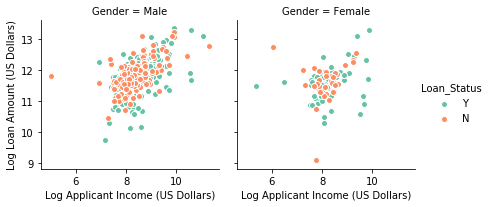

In [14]:
g = sns.FacetGrid(train, col="Gender", hue="Loan_Status", palette="Set2")
g = g.map(plt.scatter, "log_ApplicantIncome", "log_LoanAmount", edgecolor="w").add_legend()
g.set_axis_labels("Log Applicant Income (US Dollars)", "Log Loan Amount (US Dollars)")

With the plot and the proportions presented above, we can see that the gender of an applicant alone does not seem to influence the company's decision to loan them money.

### Married

  For this column we can do a similar analysis and data visualisation as the Gender one, as it only has two possible values       ('Yes' or 'No'), plus the 3 applicants that did not specify their marital status.

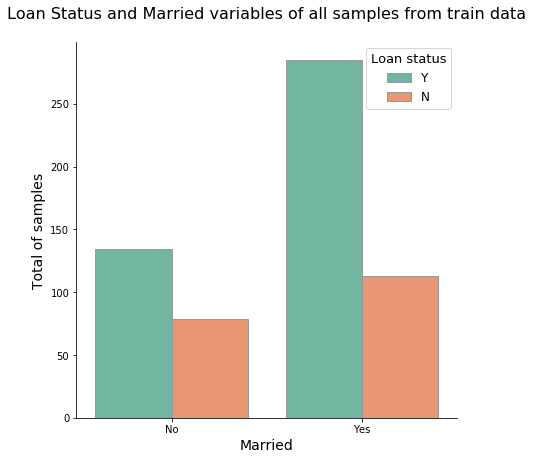

In [15]:
# Grouped barplot correlating Married and Loan_Status

loan_status_gender_count = sns.catplot(x='Married', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Married variables of all samples from train data\n", fontsize=16)
loan_status_gender_count.set_xlabels('Married', fontsize=14)
loan_status_gender_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [16]:
married_approved = train[(train.Married == 'Yes') &  (train.Loan_Status == 'Y')]
married_denied = train[(train.Married == 'Yes') &  (train.Loan_Status == 'N')]
nonmarried_approved = train[(train.Married == 'No') &  (train.Loan_Status == 'Y')]
nonmarried_denied = train[(train.Married == 'No') &  (train.Loan_Status == 'N')]

married_rate = (len(married_approved.index) / (len(married_approved.index) + len(married_denied.index)))
nonmarried_rate = (len(nonmarried_approved.index) / (len(nonmarried_approved.index) + len(nonmarried_denied.index)))

print('The proportion of approved married applicants is %.2f and that of non-married applicants is %.2f' % (married_rate, nonmarried_rate))

The proportion of approved married applicants is 0.72 and that of non-married applicants is 0.63


This time, unlike the difference in proportions with the Gender variable, we can see that **there might be a correlation** between the marital status of the applicant and their loan status decision by the company. Married applicants have a greater rate of approval than non-married applicants.

A Violin plot that also includes the log of the loan amounts demanded by each applicant can give us more insight:

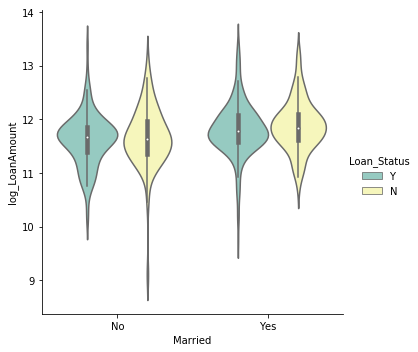

In [17]:
g = sns.catplot(x="Married", y="log_LoanAmount", hue="Loan_Status", data=train, kind="violin", palette="Set3")

It is noticeable that there is not a big difference between the loan amount values for applicants that got accepted or rejected in any of the two "Married" subgroups. 

This implies that it is not the loan amount itself that creates the discrepancy of proportion rates we calculated above.

In fact, applicants who are married tend to ask for a _greater_ loan amount than those are not married.

However, what if married applicants tend to have higher income than those are not married? We've already seen that there is a positive correlation between the applicant's income and it's loan amount, which can also influence on the loan status decision.

According to the violin plot below, that is not the case. Applicants who are married and those who are not do not have a relevant gap in their salaries.

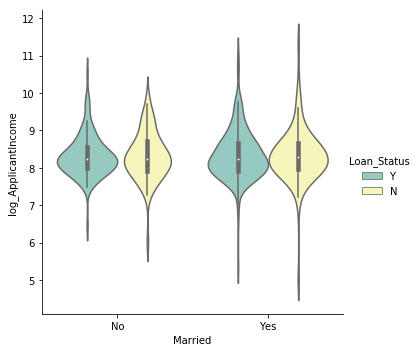

In [18]:
sns.catplot(x="Married", y="log_ApplicantIncome", hue="Loan_Status", data=train, kind="violin", palette="Set3")

Therefore, an applicant's _marital status_ **can be** a decisive factor for the company to either accept or reject someone's application.

### Dependents

Here we go to another categorical variable.

This time, however, it is not a binary one, but it actually subdivides the data into four groups, based on the number of dependents the applicant has:
 1. 0 dependents
 2. 1 dependent
 3. 2 dependents
 4. 3+ dependents

This is how many applicants we have in each category:

In [19]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

A quick overview of how this distribution occurs when we also analyse the applicant's income and loan amount is the scatter plot below.

I am not a big fan of this scatter plot though, as it is hard to see points in the plot that are being covered by other points. I am afraid it might give us an illusion that applicants who have 3+ dependents usually have a higher income than those who have none, for example.

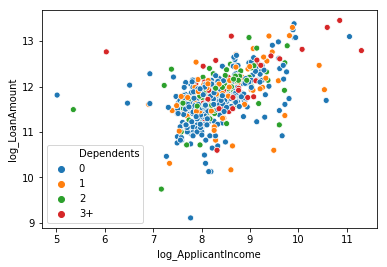

In [20]:
g = sns.scatterplot(x="log_ApplicantIncome", y="log_LoanAmount", hue="Dependents", data=train)

The violin plots will free us from making any (wrong) assumptions:

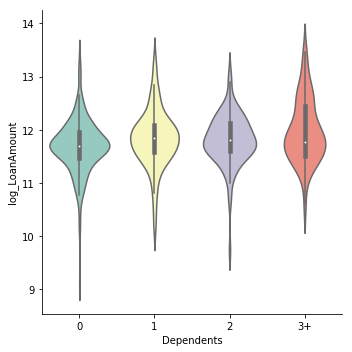

In [21]:
g = sns.catplot(x="Dependents", y="log_LoanAmount", data=train, kind="violin", palette="Set3")

In [22]:
# To make the data set more concise, let's transform the '1.0' values for the
#  'Credit_History' as a 'Yes' and the '0.0' values as a 'No' so to make it
#  a categorical variable.
train['Credit_History'] = train['Credit_History'].astype(object)
train['Credit_History'] = train['Credit_History'].replace([1, 0], ['Yes', 'No'])

# Quick look on the changes made
train['Credit_History'].head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7     No
8    Yes
9    Yes
Name: Credit_History, dtype: object

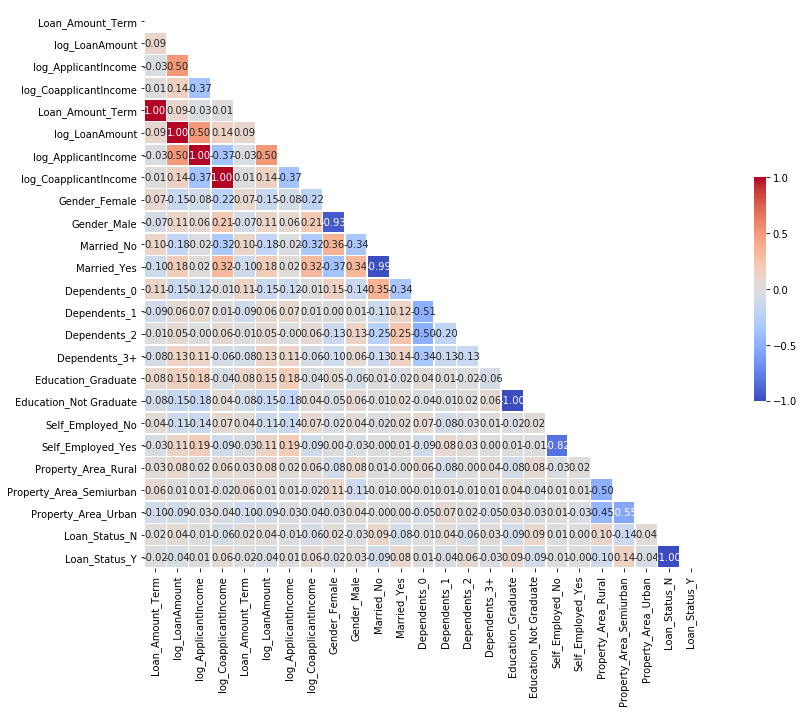

In [71]:
# Heatmap correlation matrix between all variables using Pearson's corr coefficient
train_dummy = pd.get_dummies(train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])
train_concat = pd.concat([train, train_dummy], axis = 1)
train_concat.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)
corr_matrix = train_concat.corr()

# Set up mask to hide the upper triangle (same information as the bottom one)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Setup
fig, ax = plt.subplots(figsize=(15, 10))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, mask=mask, square=True, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5,
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]}, # Shrink the legend size and label tick marks at [-1, -.5, 0, 0.5, 1]
            vmin=-1, vmax=1) # Set min and max values for the color bar

# Rotates the column labes for the x-axis to make it more presentable
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
ax.set_yticklabels(corr_matrix.columns)

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()

# corr_matrix

# Source: https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d